# <center> 👉 class_06_3 IP » _Edge / Blob Detection - Gradient, Sobel, Laplacian, Canny_ </center>

We've talked about blurring a image.   
Now, we will look at how to make the boundaries of a image clear, on the contrary.   
The process of making the boundaries of an image clear and distinct is called sharpening.   
Sharpening detects boundaries in the image, highlighting pixels at the border.

지금까지는 영상을 흐릿하게 하는 블러링에 대해 알아봤습니다.   
이번 포스팅에서는 반대로 영상의 경계를 뚜렷하게 만드는 방법에 대해 알아보겠습니다.   
영상의 경계를 선명하고 뚜렷하게 만드는 작업을 샤프닝(sharpening)이라고 합니다.   
샤프닝은 영상에서 경계를 검출하여 경계에 있는 픽셀을 강조합니다.

## ▶ Differential Filter

In order to detect the boundary (edge), it is necessary to find the point at which the pixel value changes rapidly.   
- This can be found by differentiating consecutive pixel values.   

However, pixels are not in continuous space, so we need to approximate the derivative.   
- You can do this by subtracting the values of the pixels that are stuck together. Subtracting the pixel values in the x and y directions, respectively, gives a differential approximation.

경계(엣지)를 검출하기 위해서는 픽셀 값이 급격하게 변하는 지점을 찾아야 합니다.   
- 이는 연속된 픽셀 값에 미분을 하여 찾아낼 수 있습니다.   

하지만 픽셀은 연속 공간 안에 있지 않으므로 미분 근사값을 구해야 합니다.   
- 서로 붙어 있는 픽셀 값을 빼면 됩니다. x방향, y방향으로 각각 픽셀 값을 빼면 미분 근사값이 됩니다. 

<img src='./images/practice_img/grad1.png' width=200 height=200>

The convolution kernel for calculating the differential approximation of pixel values in the image is shown below.   
The reason the elements are -1 and 1 is simply because it subtracts the value of the adjoining pixel.

영상 내 픽셀 값의 미분 근사값 연산을 위한 컨볼루션 커널은 아래와 같습니다.   
요소가 -1과 1인 이유는 단지 접해있는 픽셀 값을 빼기 때문입니다.

<img src='./images/practice_img/grad2.png' width=200 height=200>


In [2]:
# edge_differential.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

gx_kernel = np.array([[ -1, 1]])   # Differential kernels
gy_kernel = np.array([[ -1],[ 1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel) # Detect longitudinal boundaries
edge_gy = cv2.filter2D(img, -1, gy_kernel) # Detect horizontal boundaries
merged = np.hstack((img, edge_gx, edge_gy))

cv2.imshow('edge', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)),plt.title('edge_gx'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)),plt.title('edge_gy'),plt.axis('off')
plt.show()

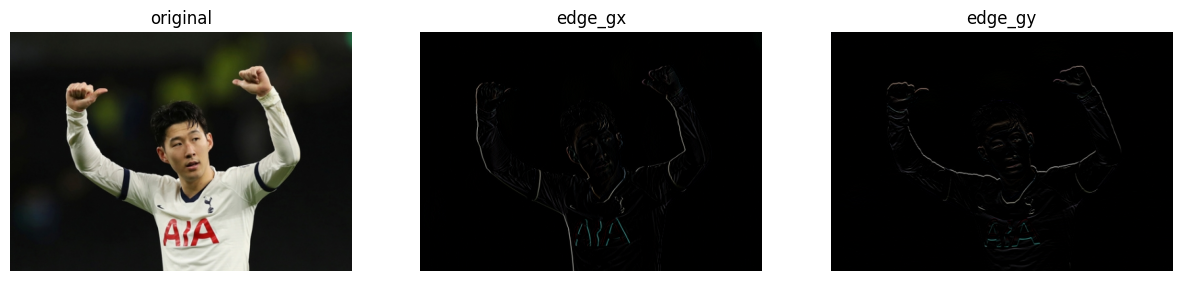

In [44]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

img = cv2.imread('./images/son/son4.jpg', -1)
gx_kernel = np.array([[ -1, 1]])    # Differential kernels
gy_kernel = np.array([[ -1],[ 1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)),plt.title('edge_gx'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)),plt.title('edge_gy'),plt.axis('off')

plt.show()

## ▶ Roberts Cross Filter 

An American engineer named Lawrence Roberts proposed the Roberts Cross Filter, which was an improvement on the basic differential filter.   
The convolution kernel for Roberts cross-filter is shown below.  

로렌스 로버츠라는 미국 엔지니어는 기본 미분 필터를 개선한 로버츠 교차 필터를 제안했습니다.   
로버츠 교차 필터를 위한 컨볼루션 커널은 아래와 같습니다.

<img src='./images/practice_img/grad3.png' width=200 height=200>

This kernel is placed diagonally with +1 and -1 to increase the effectiveness of diagonal boundary detection. However, it has the disadvantage of being sensitive to noise.  

이 커널은 대각선 방향으로 +1과 -1을 배치시켜 사선 경계 검출 효과를 높였습니다. 하지만 노이즈에 민감하다는 단점이 있습니다.

In [7]:
# edge_roberts.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

gx_kernel = np.array([[1,0], [0,-1]])  # Generate Roberts kernels
gy_kernel = np.array([[0, 1],[-1,0]])
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))

cv2.imshow('roberts cross', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)

plt.subplot(141),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(142),plt.imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)),plt.title('edge_gx'),plt.axis('off')
plt.subplot(143),plt.imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)),plt.title('edge_gy'),plt.axis('off')
plt.subplot(144),plt.imshow(cv2.cvtColor(edge_gx+edge_gy, cv2.COLOR_BGR2RGB)),plt.title('edge_gx+edge_gy'),plt.axis('off')
plt.show()

In [ ]:
## ▶ Prewitt Filter  

The Prewitt filter is a filter that detects boundaries by calculating the difference three times in each direction of the x- and y-axes.   
The Prewitt filter detects the up-down/left-right boundaries clearly well, but the diagonal detection is weak.  

프리윗 필터는 x축과 y축의 각 방향으로 차분을 세 번 계산하여 경계를 검출하는 필터입니다.   
프리윗 필터는 상하/좌우 경계는 뚜렷하게 잘 검출하지만 대각선 검출이 약합니다.

<img src='./images/practice_img/pre.png' width=300 height=300>


In [13]:
# edge_prewitt.py

import cv2
import numpy as np

file_name = "./images/practice_img/sudoku.jpg"
img = cv2.imread(file_name)

gx_k = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])  # Prewitt filter
gy_k = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)
merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))

cv2.imshow('prewitt', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)

plt.subplot(141),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(142),plt.imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)),plt.title('prewitt edge_gx'),plt.axis('off')
plt.subplot(143),plt.imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)),plt.title('prewitt edge_gy'),plt.axis('off')
plt.subplot(144),plt.imshow(cv2.cvtColor(edge_gx+edge_gy, cv2.COLOR_BGR2RGB)),plt.title('prewitt edge_gx+edge_gy'),plt.axis('off')
plt.show()

- Obviously, compared to the basic differential filter or the Roberts cross filter, the up-down/side-to-side boundary detection strength is stronger.    
- The last is the sum of the results of filtering with the up-down/left-right boundary detection filter.  

    - 확실히 기본 미분 필터나 로버츠 교차 필터에 비해 상하/좌우 경계 검출 강도가 강합니다.    
    - 마지막은 상하/좌우 경계 검출 필터로 필터링한 결과를 합친 것입니다.

## ▶ Sobel Filter  

The Sobel filter is a filter that doubles the difference in the center pixel.   
Therefore, the Sobel filter is resistant to x-axis, y-axis, and diagonal boundary detection.  

소벨 필터는 중심 픽셀의 차분 비중을 두 배로 준 필터입니다.   
따라서 소벨 필터는 x축, y축, 대각선 방향의 경계 검출에 모두 강합니다.

<img src='./images/practice_img/sobel.png' width=250 height=250>

The Roberts filter and pre-Witt filter described above are rarely used today.   
Sobel filters, on the other hand, are also used in practice, so OpenCV provides a separate function.  

앞서 설명한 로버츠 필터와 프리윗 필터는 현재는 거의 쓰이지 않습니다.   
반면 소벨 필터는 실무적으로도 쓰이므로 OpenCV에서 별도의 함수를 제공합니다.

- **dst = cv2.Sobel(src, ddepth, dx, dy, dst, ksize, scale, delta, borderType)**  

    src: input img  
    ddepth: output img dtype (-1: same as src)  
    dx, dy: Differential order, select one of 0, 1, or 2, neither can be 0 미분 차수 (0, 1, 2 중 선택, 둘 다 0일 수는 없음)  
    ksize: kernel size (one of 1, 3, 5, 7 )  
    scale: Coefficients to be used for differentiation 미분에 사용할 계수  
    delta: Values to be added to the result of the operation 연산 결과에 가산할 값  

~ Example :

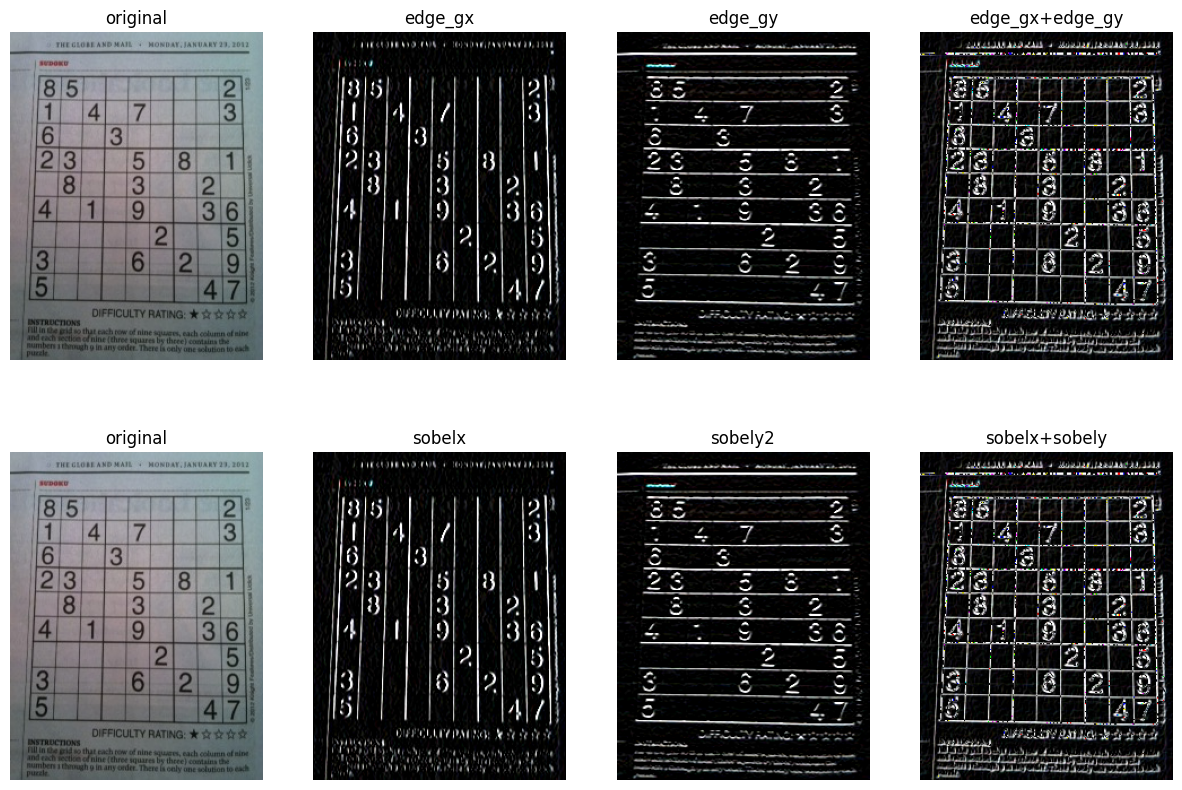

In [1]:
# edge_sobel.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])   # Sobel Filter
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)  
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3) 

merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
cv2.imshow('sobel', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(15,10))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0, 0].axis('off'), axs[0, 0].set_title('original')
axs[0, 1].imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)), axs[0, 1].axis('off'), axs[0, 1].set_title('edge_gx')
axs[0, 2].imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)), axs[0, 2].axis('off'), axs[0, 2].set_title('edge_gy')
axs[0, 3].imshow(cv2.cvtColor(edge_gx+edge_gy, cv2.COLOR_BGR2RGB)), axs[0, 3].axis('off'), axs[0, 3].set_title('edge_gx+edge_gy')
axs[1, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1, 0].axis('off'), axs[1, 0].set_title('original')
axs[1, 1].imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB)), axs[1, 1].axis('off'), axs[1, 1].set_title('sobelx')
axs[1, 2].imshow(cv2.cvtColor(sobely, cv2.COLOR_BGR2RGB)), axs[1, 2].axis('off'), axs[1, 2].set_title('sobely2')
axs[1, 3].imshow(cv2.cvtColor(sobelx+sobely, cv2.COLOR_BGR2RGB)), axs[1, 3].axis('off'), axs[1, 3].set_title('sobelx+sobely')

plt.show()

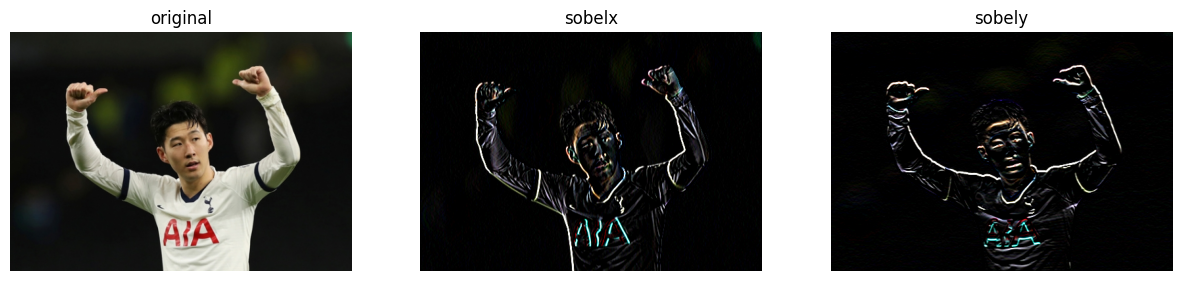

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

img = cv2.imread('./images/son/son4.jpg', -1)

sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3) 

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB)),plt.title('sobelx'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(sobely, cv2.COLOR_BGR2RGB)),plt.title('sobely'),plt.axis('off')

plt.show()

In [ ]:
## ▶ Scharr Filter  

The farther the Sobel filter is from the center of the kernel, the less accurate the edge directionality becomes.   
The filter that improves this is the Scharr filter.  
The convolution kernel for Scharr Filter is shown below.  

소벨 필터는 커널의 중심에서 멀어질수록 엣지 방향성의 정확도가 떨어집니다. 이를 개선한 필터가 샤르 필터입니다.  
샤르 필터를 위한 컨볼루션 커널은 아래와 같습니다.

<img src='./images/practice_img/scharr.png' width=300 height=300>

- **dst = cv2.Scharr(src, ddepth, dx, dy, dst, scale, delta, borderType)**  

>- all parameters are the same as cv2.Sobel() (no ksize)

In [22]:
# edge_scharr.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

gx_k = np.array([[-3,0,3], [-10,0,10],[-3,0,3]])  # scharr kernel
gy_k = np.array([[-3,-10,-3],[0,0,0], [3,10,3]])
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)

merged1 = np.hstack((img, edge_gx, edge_gy))
merged2 = np.hstack((img, scharrx, scharry))
merged = np.vstack((merged1, merged2))
cv2.imshow('Scharr', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0, 0].axis('off'), axs[0, 0].set_title('original')
axs[0, 1].imshow(cv2.cvtColor(edge_gx, cv2.COLOR_BGR2RGB)), axs[0, 1].axis('off'), axs[0, 1].set_title('edge_gx')
axs[0, 2].imshow(cv2.cvtColor(edge_gy, cv2.COLOR_BGR2RGB)), axs[0, 2].axis('off'), axs[0, 2].set_title('edge_gy')
axs[1, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1, 0].axis('off'), axs[1, 0].set_title('original')
axs[1, 1].imshow(cv2.cvtColor(scharrx, cv2.COLOR_BGR2RGB)), axs[1, 1].axis('off'), axs[1, 1].set_title('scharrx')
axs[1, 2].imshow(cv2.cvtColor(scharry, cv2.COLOR_BGR2RGB)), axs[1, 2].axis('off'), axs[1, 2].set_title('scharry')

plt.show()

## ▶ Laplacian Filter  

The Laplacyan filter is a filter with a quadratic derivative. Boundaries can be detected better.  

라플라시안 필터는 2차 미분을 적용한 필터입니다. 경계를 더 제대로 검출할 수 있습니다.

- **dst = cv2.Laplacian(src, ddepth, dst, ksize, scale, delta, borderType)**  

>-  all parameters are the same as cv2.Sobel()

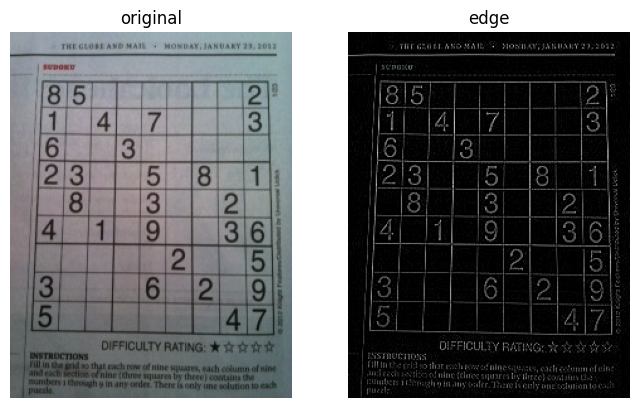

In [2]:
# edge_laplacian.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

edge = cv2.Laplacian(img, -1)
merged = np.hstack((img, edge))

cv2.imshow('Laplacian', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)),plt.title('edge'),plt.axis('off')

plt.show()

In [ ]:
✓ One Important Matter!    
https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html    
    
In our last example, output datatype is cv.CV_8U or np.uint8.  
But there is a slight problem with that.   
- Black-to-White transition is taken as Positive slope (it has a positive value)   
- while White-to-Black transition is taken as a Negative slope (It has negative value).   
- So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv.CV_16S, cv.CV_64F etc, take its absolute value and then convert back to cv.CV_8U.  
Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

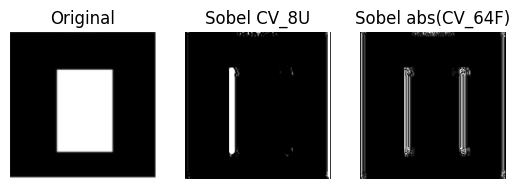

In [48]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('./images/practice_img//box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5) # Output dtype = cv.CV_8U


sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5) # Output dtype = cv.CV_64F.
abs_sobel64f = np.absolute(sobelx64f)    # Then take its absolute 
sobel_8u = np.uint8(abs_sobel64f)        # and convert to cv.CV_8U

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray'),plt.title('Original'),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray'),plt.title('Sobel CV_8U'),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray'),plt.title('Sobel abs(CV_64F)'),plt.axis('off')
plt.show()

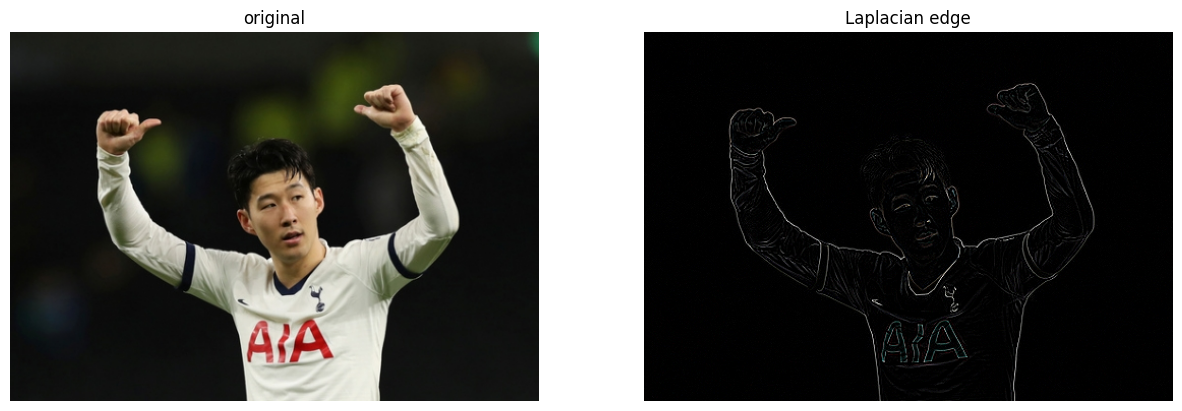

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

img = cv2.imread('./images/son/son4.jpg', -1) 
edge = cv2.Laplacian(img, -1)

merged = np.hstack((img, edge))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)),plt.title('Laplacian edge'),plt.axis('off')

plt.show()

## ▶ Canny Edge Detection

Edge detection is an image processing technique used for finding the boundaries of objects within images.   
Here we will use a popular edge detection algorithm Canny Edge Detection, developed by John F. Canny.   
In OpenCV, we have Canny() method to implement this algorithm. 

Syntax:

>**edges = cv2.Canny(img, minVal, maxVal, apertureSize, L2gradient)**

Parameters:

- img: input image whose edges we want to detect.
- minVal: Minimum intensity gradient (required)
- maxVal: Maximum intensity gradient (required)
- apertureSize: aperture size for the Sobel operator.      
- L2gradient: is a flag with default value =False, indicating the default L1 norm is enough to calculate the image gradient magnitude, if its is set as True a more accurate L2 norm is used to calculate the image gradient magnitude but it is computationally more expensive.  

    img: 입력 영상
    minVal, maxVal: 이력 스레시홀딩에 사용할 Min, Max 값
    apertureSize: 소벨 마스크에 사용할 커널 크기
    L2gradient: 그레디언트 강도를 구할 방식 (True: 제곱 합의 루트 False: 절댓값의 합)
    edges: 엣지 결과 값을 갖는 2차원 배열
    
As we can see we have two threshold values, minVal and maxVal.   
- Any edges with intensity gradient more than maxVal are sure to be edges.  
- also those edges with intensity gradient less than minVal are sure to be non-edges and are discarded.    
- The edges which lie between these two thresholds are classified edges or non-edges based on their connectivity with the 'sure edges'.  
>- If they are connected to “sure-edge” pixels, they are considered to be part of edges.   
>- Otherwise, they are also discarded as non-edges.  

Canny Edge does not use only one filter as we have seen so far, but detects boundaries according to the following four-step algorithm.

1. Noise Removal: Noise removal with 5 x 5 Gaussian blurring filter.
2. Calculate boundary gradient direction: detect boundary and gradient direction with Sobel filter
3. Non-Maximum Suppression: Select only the largest value among the boundaries detected in the gradient direction and remove the rest.
4. History thresholding: Specify two boundary values (Max, Min) to remove pixels in the boundary area that have no connection with pixels outside the larger boundary value (Max).


캐니 엣지는 지금까지 살펴본 것처럼 한 가지 필터만 사용하는 것이 아니라 다음의 4단계 알고리즘에 따라 경계를 검출합니다. 

1. 노이즈 제거: 5 x 5 가우시안 블러링 필터로 노이즈 제거
2. 경계 그레디언트 방향 계산: 소벨 필터로 경계 및 그레디언트 방향 검출
3. 비최대치 억제(Non-Maximum Suppression): 그레디언트 방향에서 검출된 경계 중 가장 큰 값만 선택하고 나머지는 제거
4. 이력 스레시홀딩: 두 개의 경계 값(Max, Min)을 지정해서 경계 영역에 있는 픽셀들 중 큰 경계 값(Max) 밖의 픽셀과 연결성이 없는 픽셀 제거

Canny edge function provided by OpenCV

- **edges = cv2.Canny(img, threshold1, threshold2, edges, apertureSize, L2gardient)**


In [31]:
# edge_canny.py

import cv2, time
import numpy as np

img = cv2.imread("./images/practice_img/sudoku.jpg")

edges = cv2.Canny(img,100,200)

cv2.imshow('Original', img)
cv2.imshow('Canny', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)),plt.title('edges'),plt.axis('off')

plt.show()

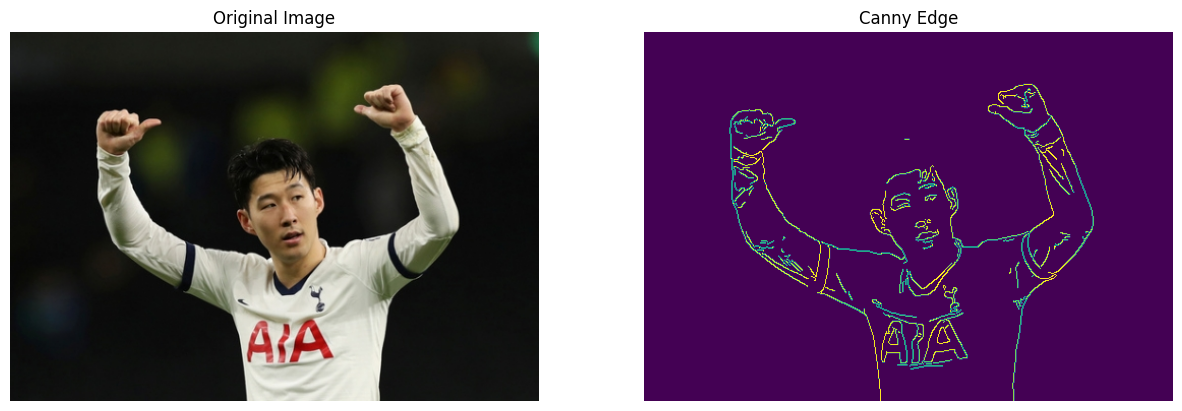

In [39]:
img = cv2.imread('./images/son/son4.jpg', -1) 
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(img,200,300,True)

fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Canny Edge')
plt.imshow(img),plt.title('Original')
plt.imshow(edges),plt.title('Canny Edge')

plt.show()

In [4]:
import cv2, time
import numpy as np
src = cv2.imread("./images/practice_img/edge1.webp", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)
canny = cv2.Canny(src, 100, 255)

cv2.namedWindow('sobel', cv2.WINDOW_NORMAL)
cv2.namedWindow('laplacian', cv2.WINDOW_NORMAL)
cv2.namedWindow('canny', cv2.WINDOW_NORMAL)
cv2.imshow("sobel",sobel)
cv2.imshow("laplacian",laplacian)
cv2.imshow("canny",canny)
cv2.waitKey()
cv2.destroyAllWindows()

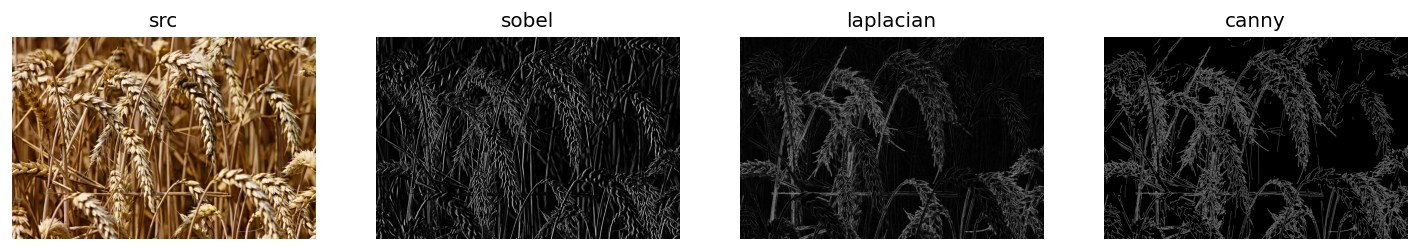

In [5]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=120)

plt.subplot(141),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('src'),plt.axis('off')
plt.subplot(142),plt.imshow(cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)),plt.title('sobel'),plt.axis('off')
plt.subplot(143),plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)),plt.title('laplacian'),plt.axis('off')
plt.subplot(144),plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)),plt.title('canny'),plt.axis('off')
plt.show()

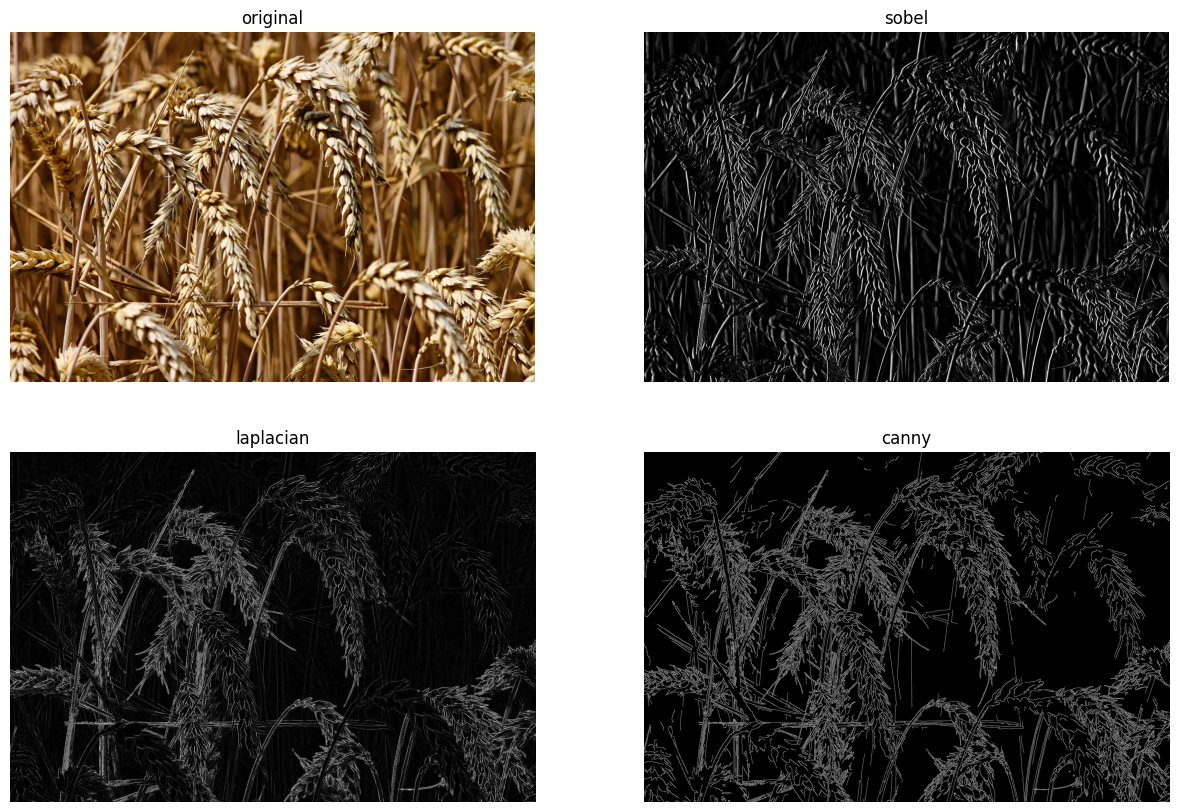

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0, 0].axis('off'), axs[0, 0].set_title('original')
axs[0, 1].imshow(cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)), axs[0, 1].axis('off'), axs[0, 1].set_title('sobel')
axs[1, 0].imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)), axs[1, 0].axis('off'), axs[1, 0].set_title('laplacian')
axs[1, 1].imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)), axs[1, 1].axis('off'), axs[1, 1].set_title('canny')

plt.show()

## ▶ Blob Detection    

https://learnopencv.com/blob-detection-using-opencv-python-c/

## ■ What is a Blob?  

A Blob is a group of connected pixels in an image that share some common property ( E.g, grayscale value ).   
In the image below, the dark connected regions are blobs, and blob detection aims to identify and mark these regions.

<img src='./images/practice_img/blob_detection.jpg'  width=400 height=400>

Blob stands for Binary Large Object where the term “Large” focuses on the object of a specific size, and that other “small” binary objects are usually considered as noise.  
- In simpler terms, a Blob is a group of connected pixels which we can find in an image and all of these pixels have some common property.   
- The goal of blob detection is to identify and mark these regions( marked by red circle).  

Using OpenCV's SimpleBlobDetector method, we can  easily find blobs in our images.

>**1.Thresholding** :First the algorithm converts the source images to several binary images by applying thresholding with various thresholds.We define two threshold values,viz- minThreshold (inclusive) to maxThreshold (exclusive)  and start from threshold value equal to minThreshold.Then it is incremented by thresholdStep until we reach maxThreshold,so the first threshold is minThreshold, the second is minThreshold + thresholdStep and so on.  
**2.Grouping** : In each binary image, we have a curve joining all the continuous points (along the boundary), having the same color or intensity.  
**3.Merging**  : The centers of the binary blobs in the binary images are computed, and  blobs located closer than minDistBetweenBlobs(minimum distance between two blobs) are merged.  
**4.Center & Radius Calculation** :  The centers and radii of the new merged blobs are computed and returned.  

This class can perform several filtrations of returned blobs by setting filterBy to True to turn on corresponding filtration.  
Available filtrations are as following:

>- **By color.** We define a parameter blobColor to filter the blobs of colours we are interested in. Set blobColor equal to zero to extract dark blobs and to extract light blobs,set it to 255. This filter compares the intensity of a binary image at the center of a blob to blobColor and filters accordingly.
>- **By area.** By using this filter the extracted blobs have an area between minArea (inclusive) and maxArea (exclusive).
>- **By circularity.** By using this filter the extracted blobs have circularity between minCircularity (inclusive) and maxCircularity (exclusive).
>- **By ratio of the minimum inertia to maximum inertia.** By using this filter the extracted blobs have this ratio between minInertiaRatio (inclusive) and maxInertiaRatio (exclusive).
>- **By convexity.** By using this filter the extracted blobs have convexity (area / area of blob convex hull) between minConvexity (inclusive) and maxConvexity (exclusive).

By default, the values of  these parameters are tuned to extract dark circular blobs.  

<img src='./images/practice_img/BlobTest.jpg'  width=400 height=400>

### ● How Does Blob Detection Work?  

Here is an example of how to use simple SimpleBlobDetector()

SimpleBlobDetector, as the name implies, is based on a rather simple algorithm described below.   
- The algorithm is controlled by parameters ( shown in bold below )  and has the following steps.   
- Scroll down to learn how the parameters are set.

- Thresholding : Convert the source images to several binary images by thresholding the source image with thresholds starting at minThreshold. These thresholds are incremented  by thresholdStep until maxThreshold. So the first threshold is minThreshold, the second is minThreshold + thresholdStep, the third is minThreshold + 2 x thresholdStep, and so on.
- Grouping : In each binary image,  connected white pixels are grouped.  Let’s call these binary blobs.
- Merging  : The centers of the binary blobs in the binary images are computed, and blobs located closer than minDistBetweenBlobs are merged.
- Center & Radius Calculation:  The centers and radii of the newly merged blobs are computed and returned.  
    
### ■ Filtering Blobs by Color, Size, and Shape  

The parameters for SimpleBlobDetector can be set to filter the type of blobs we want.

1. By Color : [ Note: This feature appears broken. I checked the code, and it appears to have a logical error ]
First, you need to set filterByColor = 1. Set blobColor = 0 to select darker blobs, and blobColor = 255 for lighter blobs. By Size :  You can filter the blobs based on size by setting the parameters filterByArea = 1, and appropriate values for minArea  and maxArea. E.g.  setting minArea = 100 will filter out all the blobs that have less then 100 pixels.By Shape : Now shape has three different parameters.

2. Circularity :  
This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than, say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.  Circularity is defined as

\frac{4*\pi*Area}{perimeter * perimeter}   This means that a circle has a circularity of 1, the circularity of a square is 0.785, and so on.

3. Convexity :
A picture is worth a thousand words.  Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1and maxConvexity ( ≤ 1) 

4. Inertia Ratio : 
Don’t let this scare you. Mathematicians often use confusing words to describe something very simple. All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1and maxInertiaRatio (≤ 1 )appropriately.

### ● How to set SimpleBlobDetector params?  

Setting parameters for SimpleBlobDetector is easy. Here is an example  

SimpleBlobDetector Example:  
OpenCV provides a convenient way to detect and filter blobs based on different characteristics.

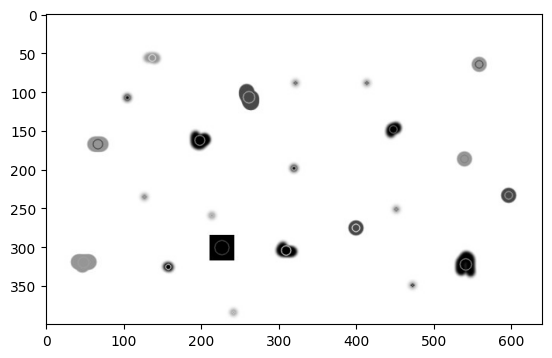

In [1]:
import cv2
import numpy as np
 
img = cv2.imread("./images/practice_img/blob_detection.jpg", cv2.IMREAD_GRAYSCALE)

params = cv2.SimpleBlobDetector_Params() # Setup SimpleBlobDetector parameters.
params.minThreshold = 10     # Change thresholds
params.maxThreshold = 200

params.filterByArea = True  # Filter by Area.
params.minArea = 1500

params.filterByCircularity = True  # Filter by Circularity
params.minCircularity = 0.1

params.filterByConvexity = True    # Filter by Convexity
params.minConvexity = 0.87

params.filterByInertia = True    # Filter by Inertia
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(img) # Detect blobs.

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv2.imshow("Keypoints", img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.imshow(img_with_keypoints)
plt.show()

## White and Black Dot Detection

we have a very basic image processing python program to count black dots in white surface and white dots in the black surface using OpenCV functions:  
    
- cv2.imread, 
>- using grayscale mode images
>- By grayscale mode, the image is converted to a black & white image composing by shades of gray.  
- th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)    
>- The function cv2.threshold works as, if pixel value is greater than a threshold value, it is assigned one value (may be white),   
>- else it is assigned another value (may be black).   
>>- First argument is the source image, which should be a grayscale image(done previously).   
>>- Second argument is the threshold value which is used to classify the pixel values.   
>>- For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, th.   
>>- If Otsu thresholding is not used, th is same as the threshold value you used.

- cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]:     
>- Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity.   
>- The contours are a useful tool for shape analysis and object detection and recognition.   
>- Contours give better accuracy for using binary images.   
> -There are three arguments in cv2.findContours() function,:  
    - first one is source image,   
    - second is contour retrieval mode,   
    - third is contour approximation method.   
>- It outputs the contours and hierarchy.   
>- Contours is a Python list of all the contours in the image.   
>- Each individual contour is a Numpy array of (x, y) coordinates of boundary points of the object.  
>- It mainly connects the black dots of the image to count.  

- cv2.contourArea:
    - can calculate the contour area of the object. Here the object is the black dots.   
    - when it gets a black dot it will calculate the area and if it satisfies the condition of minimum area to be count as a dot,   
    - then it will push the value of its area to the list xcnts.
    - At last, we don’t need the areas.   
    - If it is considered to be a dot, then its area is included in the list xcnts. 
    - So we will get the number of the dots if we calculate the length of the list.


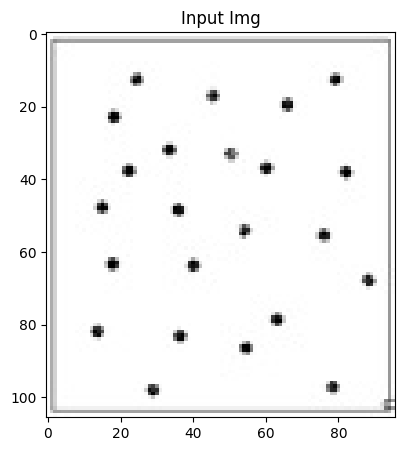

In [3]:
import cv2
# path ="C:/Users/Personal/Downloads/black dot.jpg"
path ="./images/black-dot1.jpg"
gray = cv2.imread(path, 0) # grayscale mode

from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray'),plt.axis('on'),plt.title('Input Img')
plt.show()

In [4]:
th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)   # threshold
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] # findcontours  

# filter by area
s1 = 3
s2 = 20
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("\nDots number: {}".format(len(xcnts)))


Dots number: 23
